📊 Data loaded: 205 records

✅ Plot 1 saved: plot1_flight_vs_site.png


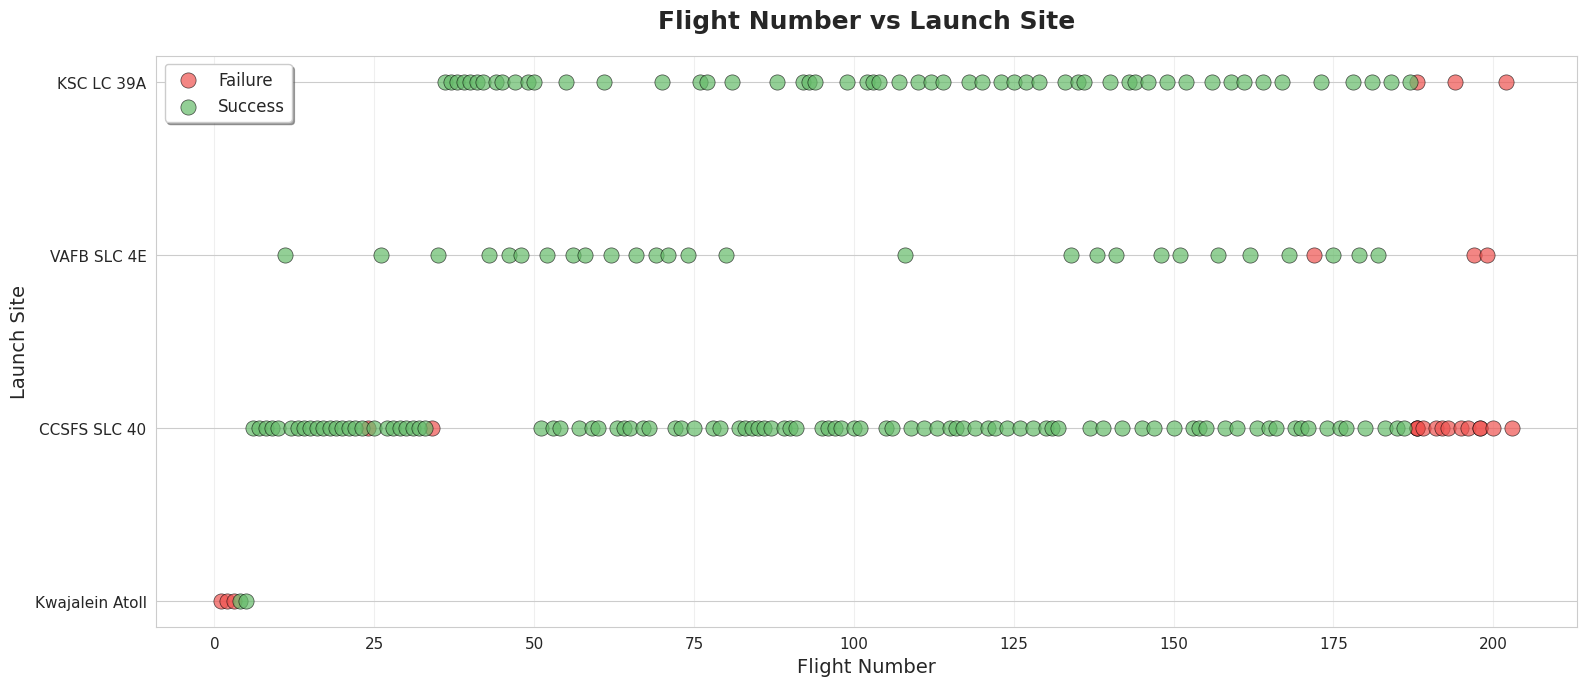

✅ Plot 2 saved: plot2_payload_vs_site.png


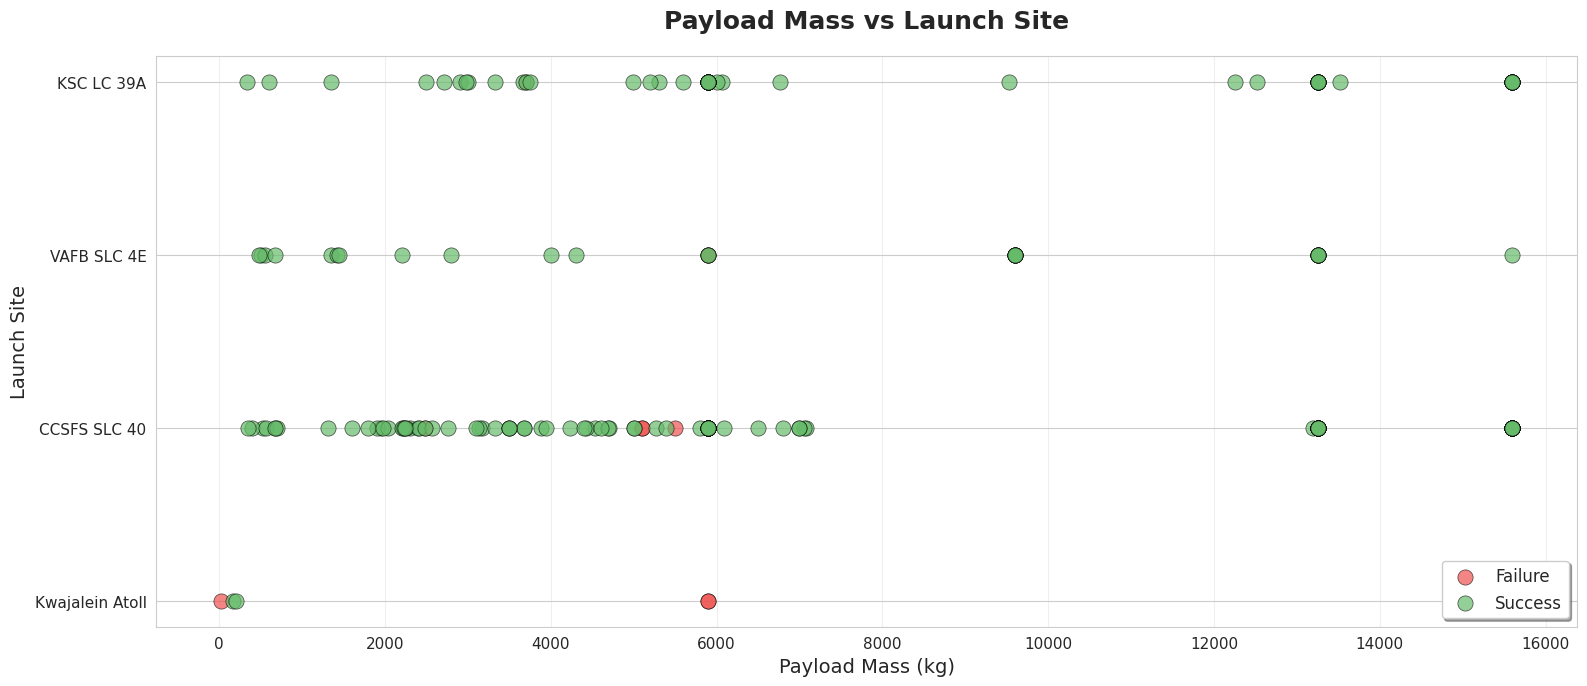

✅ Plot 3 saved: plot3_success_vs_orbit.png


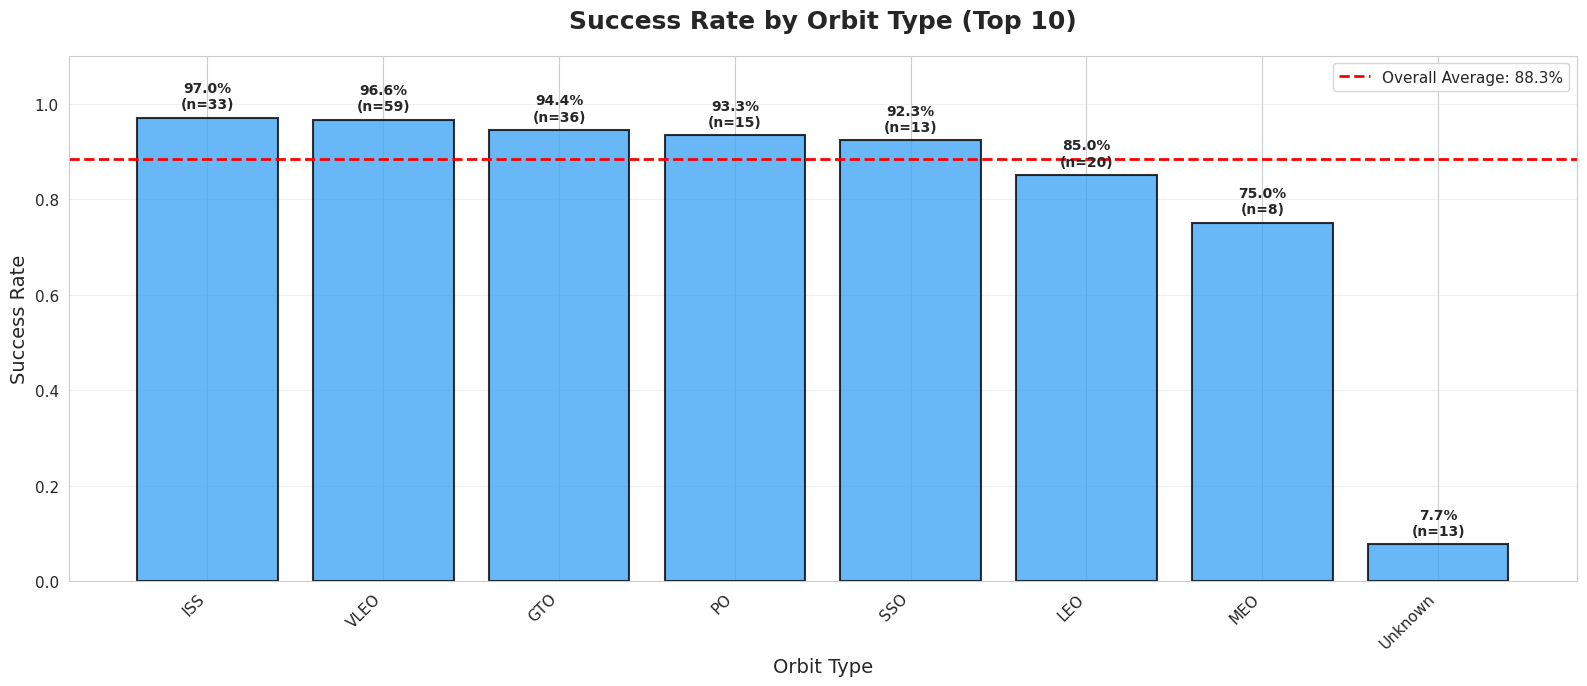

✅ Plot 4 saved: plot4_flight_vs_orbit.png


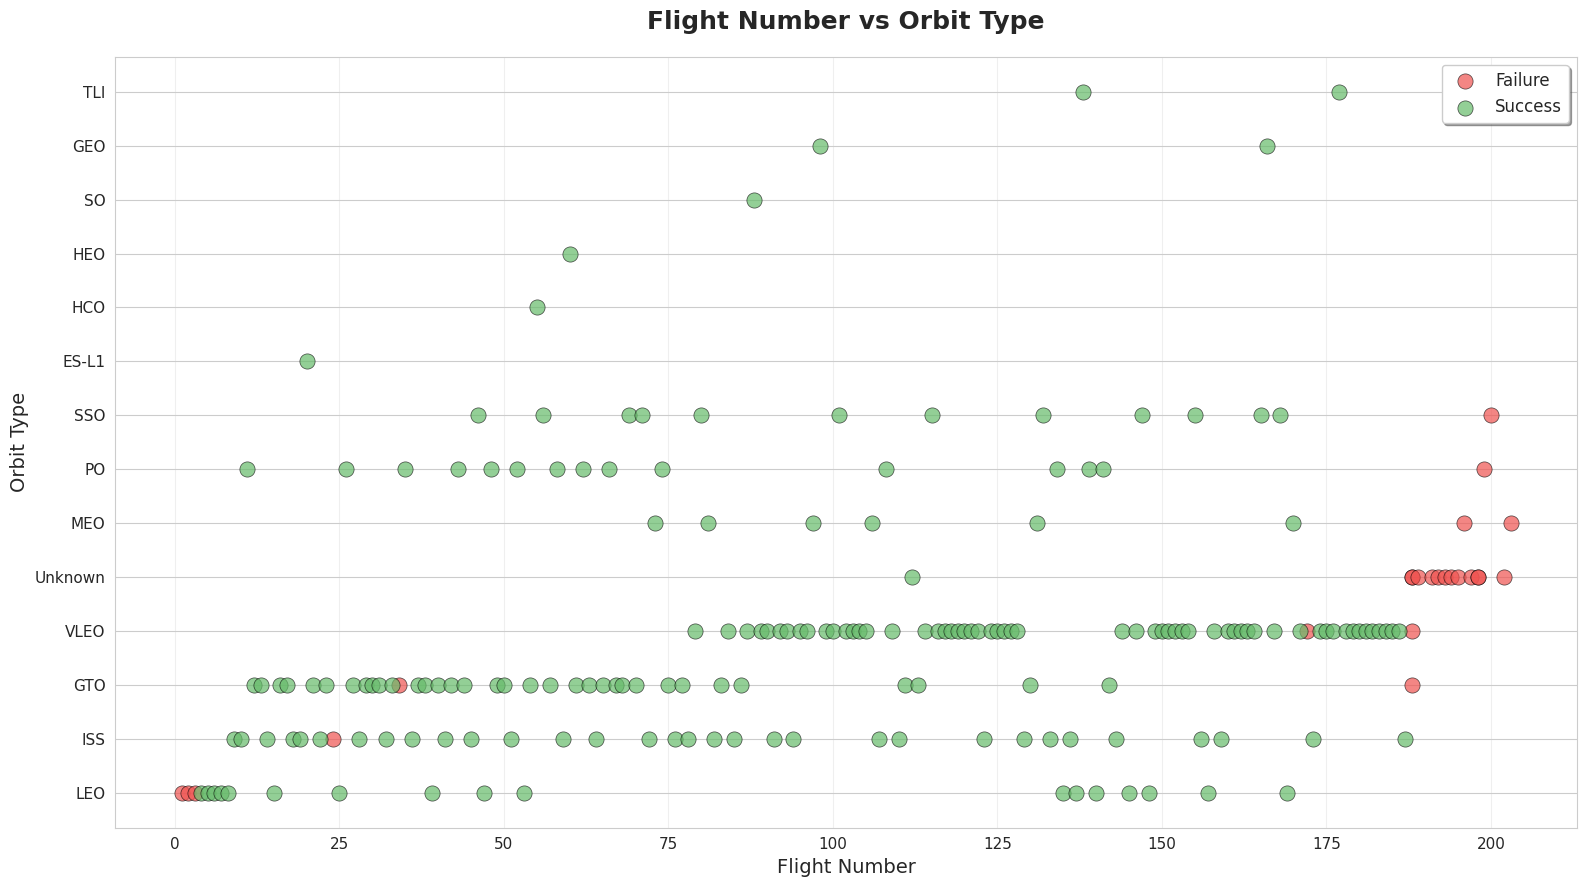

✅ Plot 5 saved: plot5_payload_vs_orbit.png


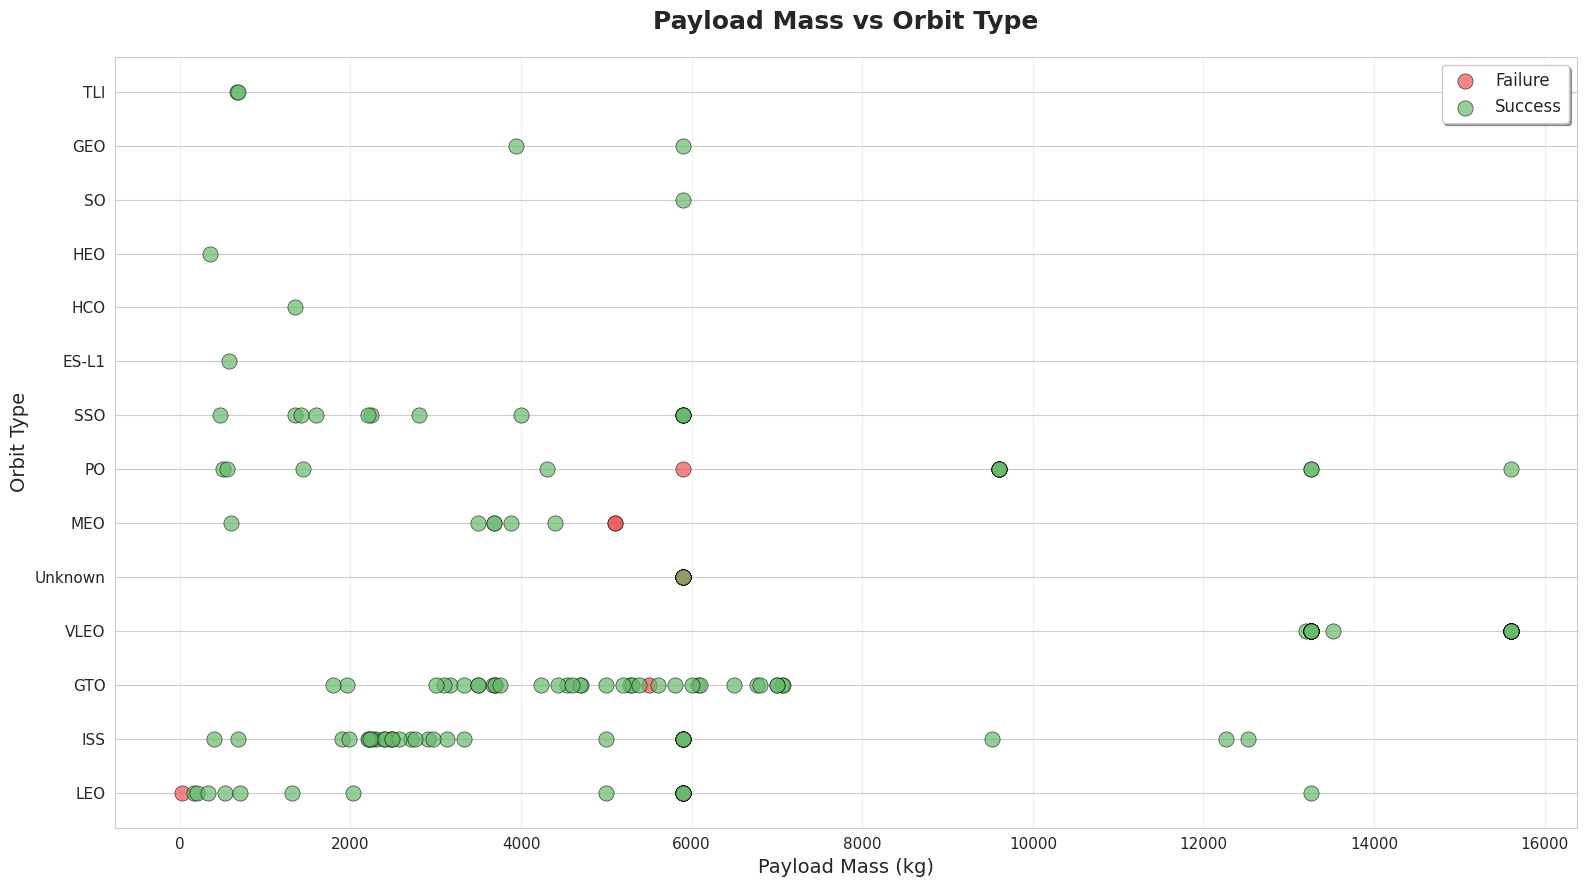

✅ Plot 6 saved: plot6_yearly_trend.png


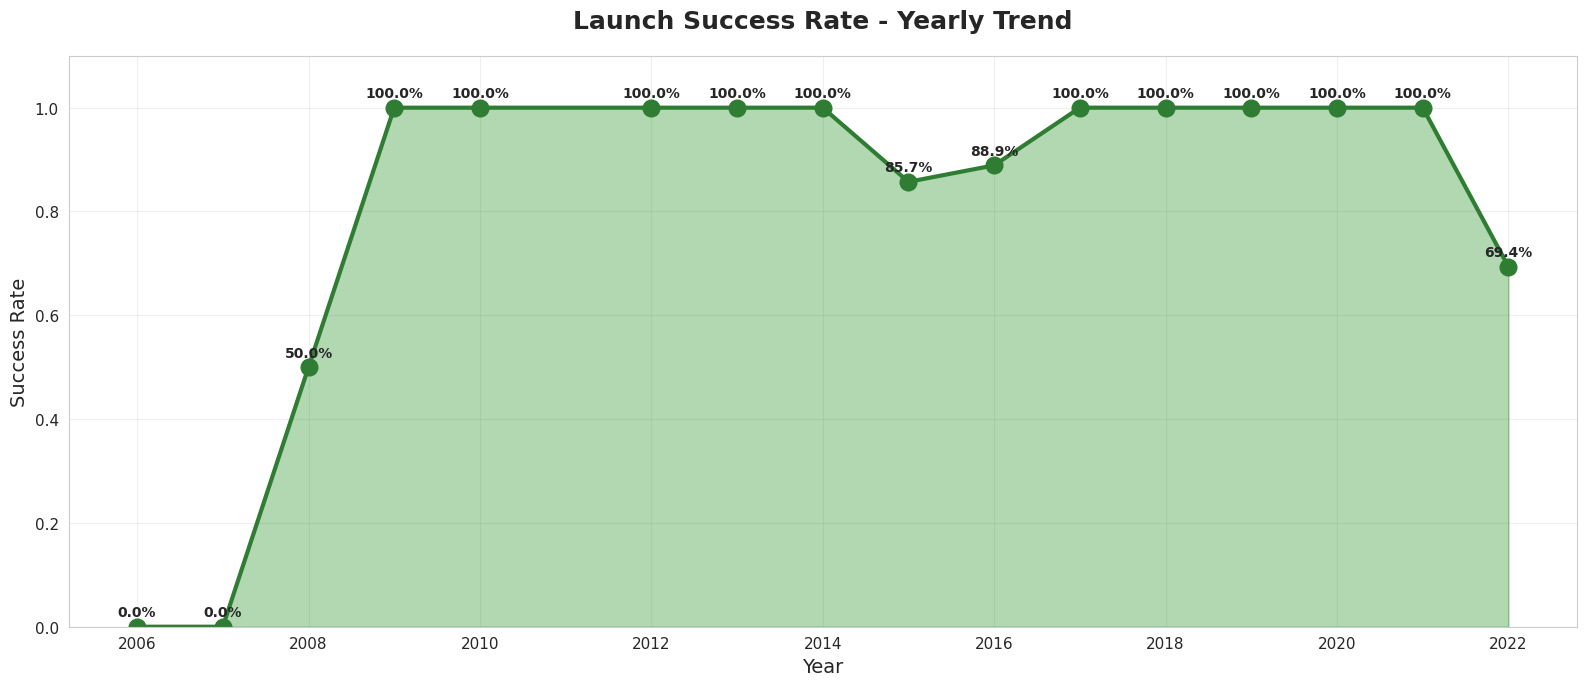


🎉 All 6 visualization plots completed!


In [ ]:
"""
SpaceX Falcon 9 - EDA with Data Visualization
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuration
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 11

# Load data
df = pd.read_csv('spacex_clean.csv')
df['Date'] = pd.to_datetime(df['Date'])
print(f"📊 Data loaded: {len(df)} records\n")

# Color scheme
colors = {0: '#EF5350', 1: '#66BB6A'}  # Red: failure, Green: success

# ============================================
# PLOT 1: Flight Number vs Launch Site
# ============================================
plt.figure(figsize=(16, 7))
for success in [0, 1]:
    data = df[df['Success'] == success]
    plt.scatter(data['FlightNumber'], data['LaunchSiteName'],
               c=colors[success], s=120, alpha=0.7,
               label='Success' if success else 'Failure',
               edgecolors='black', linewidth=0.5)

plt.title('Flight Number vs Launch Site', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Flight Number', fontsize=14)
plt.ylabel('Launch Site', fontsize=14)
plt.legend(fontsize=12, frameon=True, shadow=True)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('plot1_flight_vs_site.png', dpi=300, bbox_inches='tight')
print("✅ Plot 1 saved: plot1_flight_vs_site.png")
plt.show()

# ============================================
# PLOT 2: Payload vs Launch Site
# ============================================
plt.figure(figsize=(16, 7))
for success in [0, 1]:
    data = df[df['Success'] == success]
    plt.scatter(data['PayloadMass'], data['LaunchSiteName'],
               c=colors[success], s=120, alpha=0.7,
               label='Success' if success else 'Failure',
               edgecolors='black', linewidth=0.5)

plt.title('Payload Mass vs Launch Site', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Payload Mass (kg)', fontsize=14)
plt.ylabel('Launch Site', fontsize=14)
plt.legend(fontsize=12, frameon=True, shadow=True)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('plot2_payload_vs_site.png', dpi=300, bbox_inches='tight')
print("✅ Plot 2 saved: plot2_payload_vs_site.png")
plt.show()

# ============================================
# PLOT 3: Success Rate vs Orbit Type
# ============================================
plt.figure(figsize=(16, 7))
orbit_stats = df.groupby('Orbit')['Success'].agg(['mean', 'count'])
orbit_stats = orbit_stats[orbit_stats['count'] >= 3].sort_values('mean', ascending=False).head(10)

bars = plt.bar(orbit_stats.index, orbit_stats['mean'],
               color='#42A5F5', edgecolor='black', linewidth=1.5, alpha=0.8)

for i, (idx, row) in enumerate(orbit_stats.iterrows()):
    plt.text(i, row['mean'] + 0.02, f"{row['mean']:.1%}\n(n={int(row['count'])})",
             ha='center', fontsize=10, fontweight='bold')

plt.title('Success Rate by Orbit Type (Top 10)', fontsize=18, fontweight='bold', pad=20)
plt.ylabel('Success Rate', fontsize=14)
plt.xlabel('Orbit Type', fontsize=14)
plt.ylim(0, 1.1)
plt.xticks(rotation=45, ha='right')
plt.axhline(y=df['Success'].mean(), color='red', linestyle='--',
            linewidth=2, label=f'Overall Average: {df["Success"].mean():.1%}')
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('plot3_success_vs_orbit.png', dpi=300, bbox_inches='tight')
print("✅ Plot 3 saved: plot3_success_vs_orbit.png")
plt.show()

# ============================================
# PLOT 4: Flight Number vs Orbit Type
# ============================================
plt.figure(figsize=(16, 9))
orbit_simple = df.dropna(subset=['Orbit'])
for success in [0, 1]:
    data = orbit_simple[orbit_simple['Success'] == success]
    plt.scatter(data['FlightNumber'], data['Orbit'],
               c=colors[success], s=120, alpha=0.7,
               label='Success' if success else 'Failure',
               edgecolors='black', linewidth=0.5)

plt.title('Flight Number vs Orbit Type', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Flight Number', fontsize=14)
plt.ylabel('Orbit Type', fontsize=14)
plt.legend(fontsize=12, frameon=True, shadow=True)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('plot4_flight_vs_orbit.png', dpi=300, bbox_inches='tight')
print("✅ Plot 4 saved: plot4_flight_vs_orbit.png")
plt.show()

# ============================================
# PLOT 5: Payload vs Orbit Type
# ============================================
plt.figure(figsize=(16, 9))
for success in [0, 1]:
    data = orbit_simple[orbit_simple['Success'] == success]
    plt.scatter(data['PayloadMass'], data['Orbit'],
               c=colors[success], s=120, alpha=0.7,
               label='Success' if success else 'Failure',
               edgecolors='black', linewidth=0.5)

plt.title('Payload Mass vs Orbit Type', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Payload Mass (kg)', fontsize=14)
plt.ylabel('Orbit Type', fontsize=14)
plt.legend(fontsize=12, frameon=True, shadow=True)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('plot5_payload_vs_orbit.png', dpi=300, bbox_inches='tight')
print("✅ Plot 5 saved: plot5_payload_vs_orbit.png")
plt.show()

# ============================================
# PLOT 6: Launch Success Yearly Trend
# ============================================
plt.figure(figsize=(16, 7))
yearly_success = df.groupby('Year')['Success'].mean()

plt.plot(yearly_success.index, yearly_success.values,
         marker='o', linewidth=3, markersize=12, color='#2E7D32')
plt.fill_between(yearly_success.index, yearly_success.values, alpha=0.3, color='green')

for year, rate in yearly_success.items():
    plt.text(year, rate + 0.02, f'{rate:.1%}', ha='center', fontsize=10, fontweight='bold')

plt.title('Launch Success Rate - Yearly Trend', fontsize=18, fontweight='bold', pad=20)
plt.ylabel('Success Rate', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylim(0, 1.1)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('plot6_yearly_trend.png', dpi=300, bbox_inches='tight')
print("✅ Plot 6 saved: plot6_yearly_trend.png")
plt.show()

print("\n🎉 All 6 visualization plots completed!")
